<a href="https://colab.research.google.com/github/alvie978/Lung_cancer_studies/blob/main/Lung_cancer_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Project Title: Lung cancer studies**

This project analyzes global lung cancer patient data to identify key factors that influence patient survival and potential risks associated with lung cancer. The dataset includes patients from different countries, which allows for both demographic and geographical comparisons. The main goal of this study is to uncover patterns that could help support early detection of lung cancer.

The analysis focuses on the relationships between survival outcomes and various factors, such as lifestyle habits, family medical history, smoking behavior, and other health conditions.

**Objectives:**

* Analyze lung cancer survival rates across different countries

* Identify key health and lifestyle factors that affect patient survival

* Examine demographic trends, including age and gender

Use data visualization techniques to present clear and meaningful insights
The dataset link:https://www.kaggle.com/datasets/khwaishsaxena/lung-cancer-dataset/data

In [ ]:
#Load the dataset
data=pd.read_csv('Lung Cancer.csv')
data.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64,Male,Sweden,05-04-16,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,10-09-17,0
1,2,50,Female,Netherlands,20-04-23,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,17-06-24,1
2,3,65,Female,Hungary,05-04-23,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,09-04-24,0
3,4,51,Female,Belgium,05-02-16,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,23-04-17,0
4,5,37,Male,Luxembourg,29-11-23,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,08-01-25,0


**Step 1. Data Cleaning**

Drop the duplicated rows, and identify any null values

In [ ]:
#Identify the null values
data.isnull().sum()


,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0


In [ ]:
#Drop the duplicated rows
data.drop_duplicates(inplace=True)

In [ ]:
#Convert Diagnosed date to daytime
diagnosis_date=data.reset_index()
diagnosis_date['diagnosis_date']=pd.to_datetime(diagnosis_date['diagnosis_date'], dayfirst=True, errors='coerce')
diagnosis_date.set_index('diagnosis_date', inplace=True)

/tmp/ipython-input-3301364531.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  diagnosis_date['diagnosis_date']=pd.to_datetime(diagnosis_date['diagnosis_date'], dayfirst=True, errors='coerce')


**Explortorary Data Analysis**



In [ ]:
data.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,500.000000,54.647648,31.168168,236.493493,0.733734,0.462462,0.230230,0.099099,0.220220
std,288.530761,10.018819,8.501719,43.384815,0.442227,0.498839,0.421191,0.298945,0.414603
min,1.000000,21.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.500000,48.000000,23.650000,201.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,500.000000,55.000000,31.700000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,749.500000,61.000000,38.600000,274.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,999.000000,90.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Count how many countries are involved in this dataset
data['country'].nunique()

27

In [ ]:
#Display the patient who has hypertension, asthma, cirrhosis, other cancer and survived
data[(data['hypertension']==1) & (data['asthma']==1) & (data['cirrhosis']==1) & (data['other_cancer']==1) & (data['survived']==1)]

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
116,117,60,Male,Croatia,04-02-17,Stage I,Yes,Never Smoked,21.5,187,1,1,1,1,Chemotherapy,04-06-18,1
184,185,44,Female,Sweden,30-08-20,Stage III,No,Current Smoker,19.3,207,1,1,1,1,Radiation,04-04-21,1
488,489,49,Male,Poland,02-02-15,Stage III,No,Passive Smoker,32.7,241,1,1,1,1,Chemotherapy,19-02-16,1
584,585,49,Female,Spain,16-10-22,Stage III,Yes,Passive Smoker,23.6,215,1,1,1,1,Chemotherapy,05-04-24,1
640,641,57,Female,Finland,27-10-23,Stage II,Yes,Never Smoked,19.7,158,1,1,1,1,Surgery,22-06-25,1
761,762,59,Male,Latvia,03-07-17,Stage I,Yes,Former Smoker,41.5,293,1,1,1,1,Surgery,05-01-19,1
928,929,67,Male,Italy,06-03-22,Stage III,Yes,Former Smoker,25.0,155,1,1,1,1,Surgery,04-08-23,1


In [ ]:
len(data[(data['hypertension']==1) & (data['asthma']==1) & (data['cirrhosis']==1) & (data['other_cancer']==1) & (data['survived']==1)])

7

In [ ]:
len(data[(data['hypertension']==1) & (data['asthma']==1) & (data['cirrhosis']==1) & (data['other_cancer']==1)])

15

Based on the analysis results, only 7 out of 15 patients with additional health conditions such as hypertension, asthma, cirrhosis, or other cancers survived lung cancer. Among these 7 survivors, only one was a current smoker, and this patient did not have a family history of lung cancer.

Additionally, 5 of the 7 surviving patients reported having a family history of lung cancer. This may suggest that individuals with a family history are more aware of early symptoms and warning signs, which could lead to earlier medical intervention and improved survival outcomes.

In [ ]:
#Display the patients who has no hypertension, asthma,cirrhosis or other cancer
data[(data['hypertension']==0) & (data['asthma']==0) & (data['cirrhosis']==0) & (data['other_cancer']==0)]

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
4,5,37,Male,Luxembourg,29-11-23,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,08-01-25,0
6,7,49,Female,Croatia,21-05-18,Stage III,Yes,Passive Smoker,43.1,259,0,0,0,0,Radiation,06-05-19,1
8,9,64,Male,Sweden,21-03-21,Stage III,Yes,Current Smoker,21.5,236,0,0,0,0,Chemotherapy,07-03-22,0
11,12,47,Male,Malta,18-11-19,Stage II,Yes,Former Smoker,33.9,287,0,0,0,0,Combined,18-02-21,0
17,18,45,Male,Romania,07-08-17,Stage II,No,Former Smoker,23.1,213,0,0,0,0,Combined,03-08-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,984,51,Female,Greece,05-01-21,Stage IV,No,Former Smoker,25.9,166,0,0,0,0,Surgery,04-09-21,0
984,985,54,Female,Sweden,11-03-19,Stage III,Yes,Current Smoker,20.7,179,0,0,0,0,Surgery,07-01-20,0
991,992,54,Male,Malta,09-07-17,Stage IV,No,Passive Smoker,28.3,180,0,0,0,0,Combined,20-06-18,0
994,995,64,Male,Italy,26-05-24,Stage III,Yes,Never Smoked,29.5,237,0,0,0,0,Surgery,25-06-25,0


In [ ]:
#Count how many patient in the dataset who has no additional health conditions
len(data[(data['hypertension']==0) & (data['asthma']==0) & (data['cirrhosis']==0) & (data['other_cancer']==0)])

151

In [ ]:
#Display the patients who has no hypertension, asthma,cirrhosis or other cancer and survived
data[(data['hypertension']==0) & (data['asthma']==0) & (data['cirrhosis']==0) & (data['other_cancer']==0) & (data['survived']==1)]


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
6,7,49,Female,Croatia,21-05-18,Stage III,Yes,Passive Smoker,43.1,259,0,0,0,0,Radiation,06-05-19,1
38,39,56,Female,Cyprus,03-05-15,Stage III,Yes,Former Smoker,32.0,288,0,0,0,0,Surgery,23-12-15,1
56,57,63,Female,Germany,03-09-23,Stage II,No,Former Smoker,17.6,183,0,0,0,0,Surgery,27-06-25,1
102,103,66,Female,Hungary,21-04-16,Stage III,No,Former Smoker,28.8,160,0,0,0,0,Combined,06-01-17,1
181,182,51,Male,Hungary,17-07-19,Stage III,Yes,Never Smoked,43.8,278,0,0,0,0,Combined,02-01-21,1
204,205,45,Male,Cyprus,07-11-23,Stage I,Yes,Never Smoked,26.5,193,0,0,0,0,Surgery,26-04-25,1
341,342,64,Male,Cyprus,09-04-23,Stage I,Yes,Former Smoker,26.2,187,0,0,0,0,Combined,07-08-24,1
382,383,60,Male,Latvia,08-05-16,Stage I,Yes,Current Smoker,37.1,272,0,0,0,0,Surgery,26-10-17,1
398,399,69,Female,Italy,10-11-19,Stage II,No,Never Smoked,31.9,279,0,0,0,0,Combined,26-07-21,1
410,411,53,Male,Belgium,04-03-16,Stage II,Yes,Former Smoker,37.8,286,0,0,0,0,Surgery,22-01-18,1


In [ ]:
len(data[(data['hypertension']==0) & (data['asthma']==0) & (data['cirrhosis']==0) & (data['other_cancer']==0) & (data['survived']==1)])

30

Based on the results, 151 patients has no other health conditions, 30 of them survived lung cancer.

In [ ]:
data['diagnosis_date'] = pd.to_datetime(data['diagnosis_date'], format='%d-%m-%y', errors='coerce')
data['diagnosis_year'] = data['diagnosis_date'].dt.year
data['diagnosis_year'].value_counts().sort_index()

,count
diagnosis_year,
2014,54
2015,109
2016,86
2017,96
2018,78
2019,111
2020,111
2021,113
2022,91


In [ ]:
#Display which year has highest lung cancer patient
data['diagnosis_year'].value_counts().idxmax()

np.int32(2023)

In [ ]:
#Count how many patients for each stage
data['cancer_stage'].value_counts()

,count
cancer_stage,
Stage I,255
Stage II,249
Stage III,248
Stage IV,247


In [ ]:
#Count how many patients survived for each stage
survived_by_stage = data[data['survived']==1]['cancer_stage'].value_counts()
# Define the desired order of stages
desired_order = ['Stage I', 'Stage II', 'Stage III', 'Stage IV']
# Reindex the series to enforce the desired order
survived_by_stage = survived_by_stage.reindex(desired_order, fill_value=0)
#Display the results like Stage I Stage II etc
print(survived_by_stage)

cancer_stage
Stage I      61
Stage II     45
Stage III    60
Stage IV     54
Name: count, dtype: int64


In [ ]:
#Display the youngest patient
data[data['age']==data['age'].min()]

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,diagnosis_year
23,24,21,Female,Greece,2023-05-16,Stage I,No,Never Smoked,38.0,287,1,0,0,1,Chemotherapy,12-07-24,0,2023


In [ ]:
#Display the oldest patient
data[data['age']==data['age'].max()]

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,diagnosis_year
760,761,90,Male,Luxembourg,2023-07-16,Stage II,Yes,Current Smoker,18.9,202,1,1,0,0,Chemotherapy,19-04-25,0,2023


In [ ]:
#Count number of female patient and male patient
data['gender'].value_counts()

,count
gender,
Female,505
Male,494


In [ ]:
#Display the survival rate for both female and male
data.groupby('gender')['survived'].mean()

,survived
gender,
Female,0.213861
Male,0.226721


**Step 3 Data Visualization**

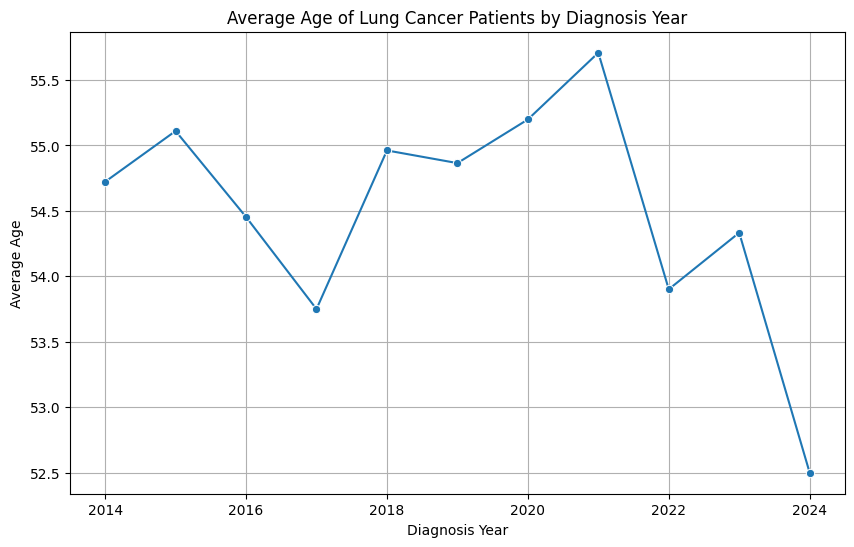

In [ ]:
# Calculate the average age of patients by diagnosis year
avg_age_by_year = data.groupby('diagnosis_year')['age'].mean().reset_index()

# Create the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x='diagnosis_year', y='age', data=avg_age_by_year, marker='o')
plt.title('Average Age of Lung Cancer Patients by Diagnosis Year')
plt.xlabel('Diagnosis Year')
plt.ylabel('Average Age')
plt.grid(True)
plt.show()

This line chart shows the average age of lung cancer patients by diagnosis year from 2014 to 2024. Overall, the average age remains relatively stable, mostly fluctuating between 53 and 56 years, suggesting no dramatic long-term shift in the age at diagnosis.

From 2014 to 2017, there is a slight decline in average age, reaching a local low around 2017. This is followed by a noticeable increase between 2018 and 2021, where the average age peaks at approximately 56 years, indicating that patients diagnosed during this period tended to be slightly older.

After 2021, the trend reverses. The average age drops sharply in 2022, recovers modestly in 2023, and then falls again in 2024, reaching the lowest point on the graph. This recent decline may suggest earlier detection, changes in population demographics, or external factors such as screening practices or data coverage.

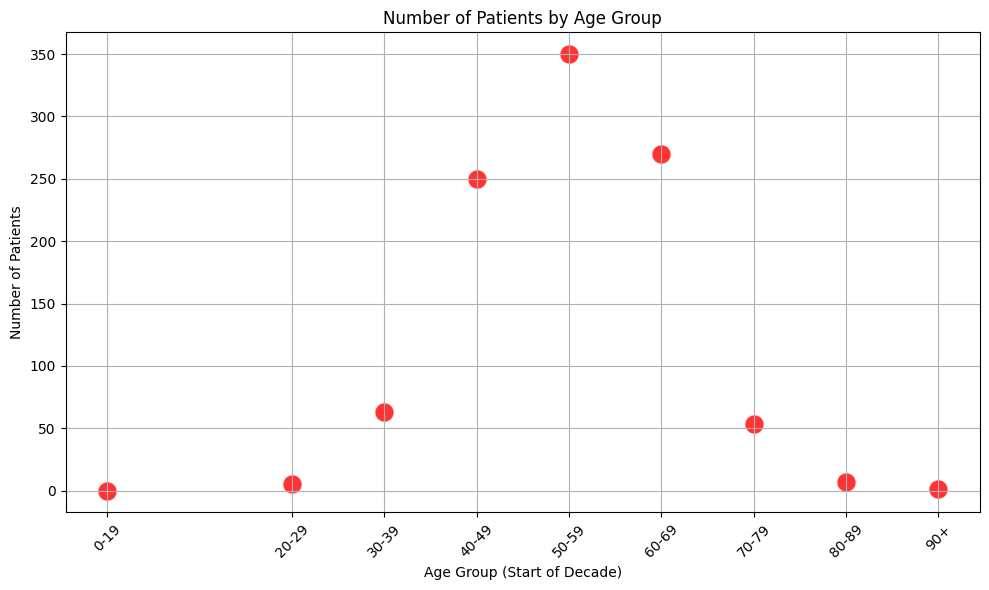

In [ ]:
# Define age bins (e.g., 10-year intervals)
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Create a new column for age groups
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Count patients in each age group
age_group_counts = data['age_group'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['age_group', 'count']

# For scatter plot, convert age_group labels to a numeric representation (e.g., lower bound of the bin)
age_group_counts['age_start'] = age_group_counts['age_group'].apply(lambda x: int(x.split('-')[0]) if '-' in x else int(x.replace('+', '')))

# Create the scatter graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_start', y='count', data=age_group_counts, s=200, color='red', alpha=0.8)
plt.title('Number of Patients by Age Group')
plt.xlabel('Age Group (Start of Decade)')
plt.ylabel('Number of Patients')
plt.xticks(age_group_counts['age_start'], labels=age_group_counts['age_group'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot shows the number of lung cancer patients across different age groups. A clear pattern emerges where cases are heavily concentrated in middle-aged and older adults, rather than younger age groups.

Very few patients are observed below the age of 30, indicating that lung cancer is relatively rare among younger populations. The number of cases increases sharply from the 30-39 group and continues to rise through 40-49, reaching a peak in the 50-59 age group, which has the highest number of patients.

After age 60, the number of patients begins to decline. While the 60-69 group still shows a relatively high count, there is a noticeable drop in the 70-79 group, followed by very low numbers in the 80-89 and 90+ categories. This decline may reflect lower population sizes at very old ages, survival bias, or underdiagnosis.

Overall, the graph suggests that lung cancer incidence is most common among individuals aged 40 to 69, particularly those in their 50s, highlighting this age range as a key target for screening, prevention, and early detection efforts.

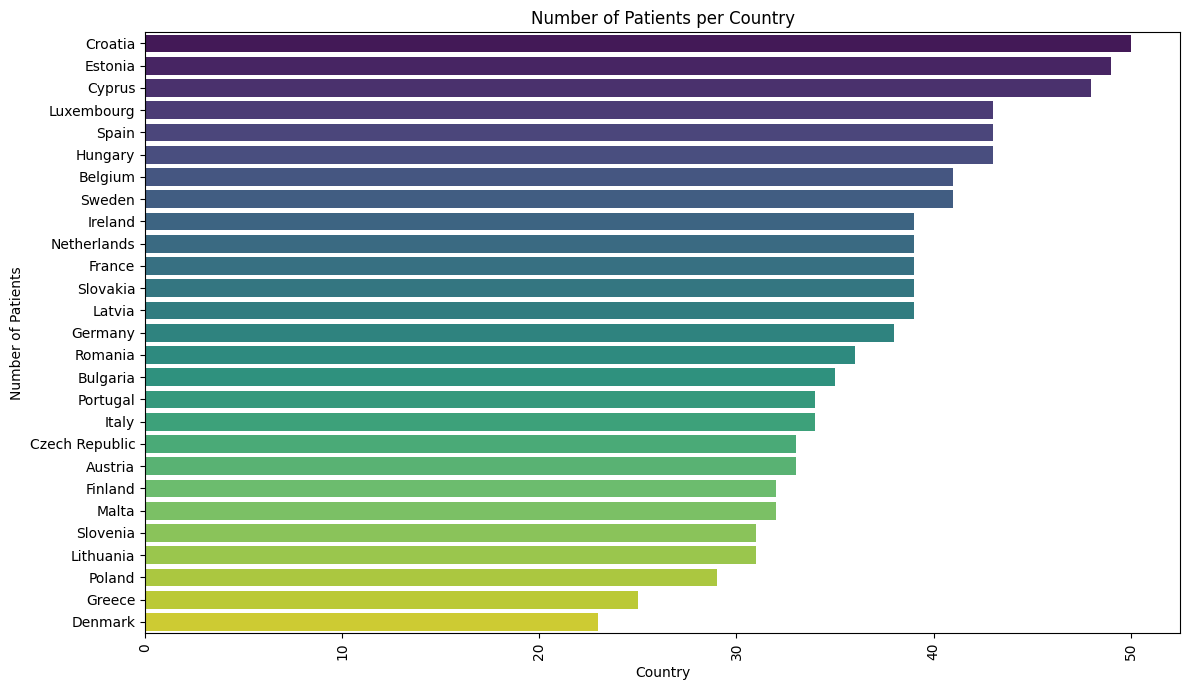

In [ ]:
# Count the number of patients for each country
country_counts = data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Create the bar graph
plt.figure(figsize=(12, 7))
sns.barplot(x='count', y='country', hue='country', data=country_counts, palette='viridis', legend=False)
plt.title('Number of Patients per Country')
plt.xlabel('Country')
plt.ylabel('Number of Patients')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The graph shows that Croatia has the highest lung cancer rate in the dataset, followed by Estonia and Cyprus. Publicly available data indicates that Croatia has one of the highest smoking rates in Europe, with nearly 30% of adults identified as smokers.

In Cyprus, historically relaxed tobacco control policies have made tobacco products more accessible across different age groups. These factors may help explain the relatively high lung cancer rates observed in these countries.

##**Analyzation of Cardiometabolic risk factors**

This section visualizes three key aspects:

* The distribution of BMI for survived vs. not-survived patients
* The distribution of cholesterol levels for survived vs. not-survived patients
* The survival outcomes of patients with and without hypertension



**Visualize BMI vs. Survival Rate**


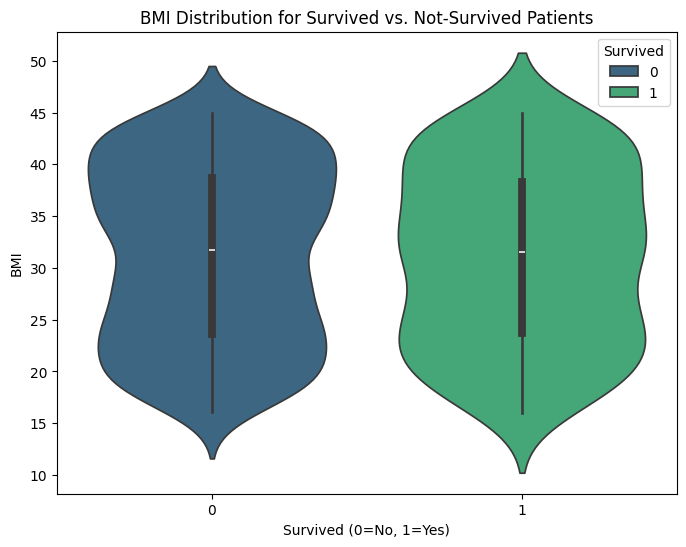

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='survived', y='bmi', hue='survived', data=data, palette='viridis')
plt.title('BMI Distribution for Survived vs. Not-Survived Patients')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.legend(title='Survived', loc='upper right')
plt.show()

This violin plot compares the BMI distribution of patients who did not survive (0) and those who survived (1). Overall, the two distributions look very similar, suggesting that BMI alone may not be a strong differentiating factor for survival in this dataset.

Both groups have a wide spread of BMI values, roughly ranging from the mid-teens to the mid-40s. The median BMI for both survived and non-survived patients appears to be around the low-30s, indicating that the central tendency is almost the same across the two groups.

The shape of the violins shows that most patients in both categories are concentrated between BMI 20 and 40, with slight peaks around the mid-20s and mid-30s. There is no clear shift where one group consistently has higher or lower BMI values than the other.

In summary, this graph suggests that BMI does not show a clear association with survival outcomes for lung cancer patients in this sample. Any potential effect of BMI on survival is likely small or overshadowed by other factors such as age, cancer stage, or treatment type, which would require further analysis to confirm.

## **Visualize Cholesterol Level vs. Survival Rate**


Cholesterol levels might play a role in lung cancer, but it's not as simple as eating foods high in cholesterol. Cancer cells, including lung cancer cells, often use more cholesterol to grow and divide. Problems with how the body manages cholesterol in cells and tissues can help cancer develop. Interestingly, studies also suggest that people with lower cholesterol in their blood may have a higher risk of lung cancer, possibly because it reflects other health problems. Overall, cholesterol produced and regulated within the body and its cells, rather than dietary cholesterol alone, appears to play a more significant role in lung cancer risk.

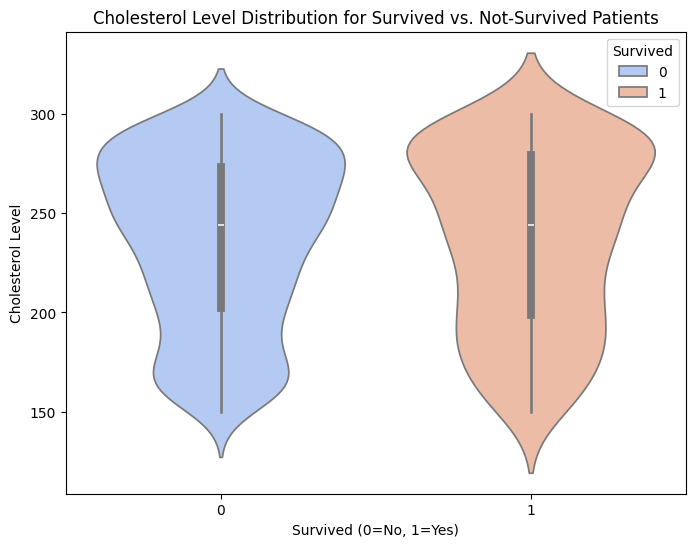

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='survived', y='cholesterol_level', hue='survived', data=data, palette='coolwarm')
plt.title('Cholesterol Level Distribution for Survived vs. Not-Survived Patients')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Cholesterol Level')
plt.legend(title='Survived', loc='upper right')
plt.show()

This violin plot compares cholesterol level distributions between patients who survived and those who did not. Overall, both groups show a very similar spread and central tendency in cholesterol levels. Most patients, regardless of survival outcome, have cholesterol values concentrated roughly between 200 and 280.

The median cholesterol levels for survived and non-survived patients appear to be almost the same, suggesting that cholesterol alone may not be a strong distinguishing factor in patient survival. While both groups include patients with lower cholesterol (around 150–180) and higher cholesterol (close to 300), there is no clear separation between the two distributions.

This indicates that cholesterol level by itself is unlikely to be a key predictor of survival and should be considered alongside other clinical or lifestyle factors rather than in isolation.

**Hypertension Status VS Survival Rate**





To examine survival rates based on hypertension status, the numbers of patients who survived and did not survive are first calculated for each group. A grouped bar chart is then created using seaborn.countplot, with hypertension status displayed on the x-axis and survival outcomes distinguished by color. Clear titles and axis labels are added to make the chart easier to understand

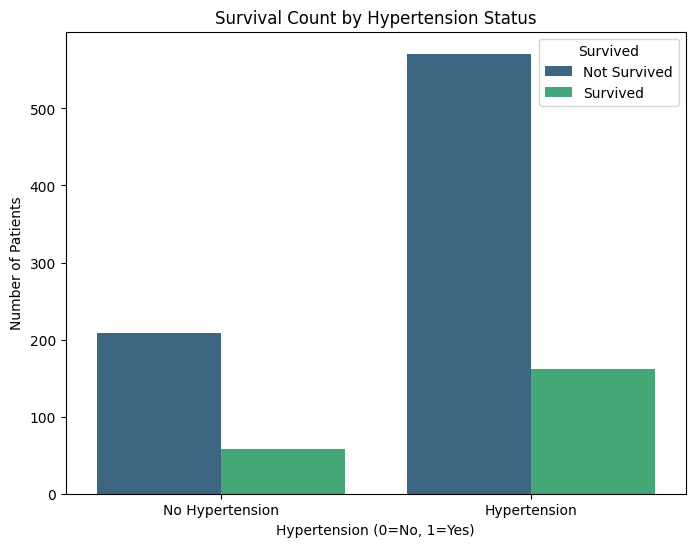

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', hue='survived', data=data, palette='viridis')
plt.title('Survival Count by Hypertension Status')
plt.xlabel('Hypertension (0=No, 1=Yes)')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No Hypertension', 'Hypertension'])
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

This bar chart shows the number of patients who survived or did not survive, grouped by hypertension status. A clear pattern can be observed in this graph.

Patients with hypertension make up the majority of the dataset and also have a much higher number of non-survivors compared to survivors. Although there are still survivors within the hypertension group, the gap between survived and not survived patients is noticeably large.

In contrast, patients without hypertension show lower overall counts, but the difference between survivors and non-survivors is smaller. This suggests that individuals without hypertension may have better survival outcomes relative to their group size.

Overall, this graph suggests that hypertension is strongly associated with lower survival, making it a potentially important risk factor in patient outcomes.

Even though the number of patients with hypertension is different from those without hypertension, the chart suggests that patients with hypertension have a higher likelihood of not surviving compared to those without the condition.

In [ ]:
num_hypertension_patients = len(data[data['hypertension'] == 1])
print("There are " + str(num_hypertension_patients) + " patients with hypertension")

num_no_hypertension_patients = len(data[data['hypertension'] == 0])
print("There are " + str(num_no_hypertension_patients) + " patients without hypertension")

There are 733 patients with hypertension
There are 266 patients without hypertension


In this dataset, a large proportion of patients are affected by hypertension, which suggests a possible relationship between lung cancer and high blood pressure. It is not entirely clear whether lung cancer contributes to the development of hypertension or if pre-existing hypertension increases the risk of lung cancer. However, existing research provides some clues. Studies suggest that inflammation in blood vessels may act as a key link between lung cancer and pulmonary hypertension. Rather than cancer cells directly blocking blood vessels, the body's immune response appears to play a more important role. When a lung tumor is present, immune cells tend to accumulate around nearby blood vessels, leading to inflammation. This inflammation can cause the vessel walls to thicken and narrow, restricting blood flow and increasing blood pressure in the lungs. Evidence from animal studies supports this idea, as these vascular changes did not occur when immune cells were removed, highlighting inflammation as a major triggering factor.

Ref: Lung cancer triggers pulmonary hypertension. (n.d.). Www.mpg.de. https://www.mpg.de/11776102/lung-cancer-pulmonary-hypertension

‌

Let's visualize the combination of the above factors

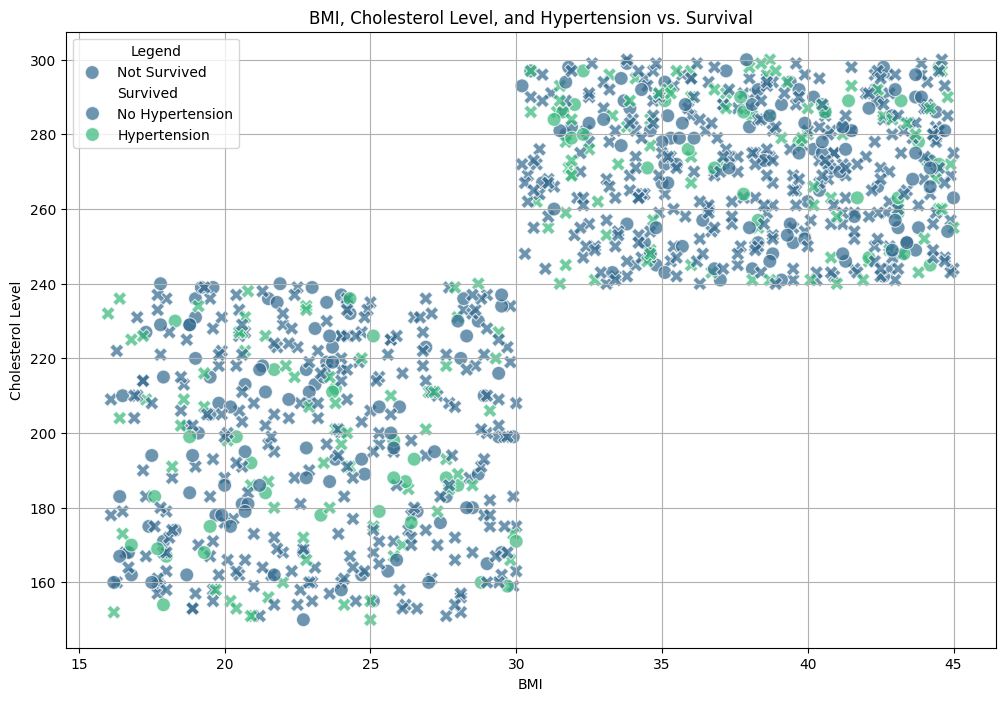

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='bmi', y='cholesterol_level', hue='survived', style='hypertension', data=data, palette='viridis', s=100, alpha=0.7)
plt.title('BMI, Cholesterol Level, and Hypertension vs. Survival')
plt.xlabel('BMI')
plt.ylabel('Cholesterol Level')
plt.legend(title='Legend', loc='best', labels=['Not Survived', 'Survived', 'No Hypertension', 'Hypertension'])
plt.grid(True)
plt.show()

##**Analyzation of asthma, cirrhosis, other cancer and associated survival rate**

In [ ]:
hypertension_survival_rate = data.groupby('hypertension')['survived'].mean()
asthma_survival_rate = data.groupby('asthma')['survived'].mean()
cirrhosis_survival_rate = data.groupby('cirrhosis')['survived'].mean()
other_cancer_survival_rate = data.groupby('other_cancer')['survived'].mean()

print("Survival Rate by Hypertension Status:\n", hypertension_survival_rate)
print("\nSurvival Rate by Asthma Status:\n", asthma_survival_rate)
print("\nSurvival Rate by Cirrhosis Status:\n", cirrhosis_survival_rate)
print("\nSurvival Rate by Other Cancer Status:\n", other_cancer_survival_rate)

Survival Rate by Hypertension Status:
 hypertension
0    0.218045
1    0.221010
Name: survived, dtype: float64

Survival Rate by Asthma Status:
 asthma
0    0.210428
1    0.231602
Name: survived, dtype: float64

Survival Rate by Cirrhosis Status:
 cirrhosis
0    0.224967
1    0.204348
Name: survived, dtype: float64

Survival Rate by Other Cancer Status:
 other_cancer
0    0.215556
1    0.262626
Name: survived, dtype: float64


**Hypertension**: The survival rates are almost the same. This suggests that hypertension alone does not have a strong impact on survival in this dataset.

**Asthma**: Patients with asthma show a slightly higher survival rate. This might be unexpected, but it could be due to factors like earlier diagnosis, closer medical monitoring, or sample size effects.

**Cirrhosis Status**:Patients with cirrhosis have a lower survival rate, which makes clinical sense since cirrhosis indicates severe liver damage and can worsen overall health outcomes.

**Other cancer**: Interestingly, patients with another type of cancer show a higher survival rate. This could be because these patients are under more intensive medical care or were diagnosed at an earlier stage.

##**Survival rate by Asthma Status**

Asthma may influence lung cancer development mainly through long-term inflammation in the lungs. Asthma is a chronic condition where the airways are repeatedly inflamed, and this constant inflammation can damage lung tissue over time. According to the study, genetic evidence suggests that people who are more likely to develop asthma also have a slightly higher risk of lung cancer. This ongoing inflammatory environment may increase DNA damage and disrupt normal cell repair processes, making it easier for abnormal cells to grow into cancer. Overall, the findings support the idea that asthma is not just a co-existing condition, but may actively contribute to the development of lung cancer through chronic airway inflammation.

Ref: Ye, Lingling, et al. “Evidence of the Association between Asthma and Lung Cancer Risk from Mendelian Randomization Analysis.” Scientific Reports, vol. 14, no. 1, 4 Oct. 2024, https://doi.org/10.1038/s41598-024-74883-7.

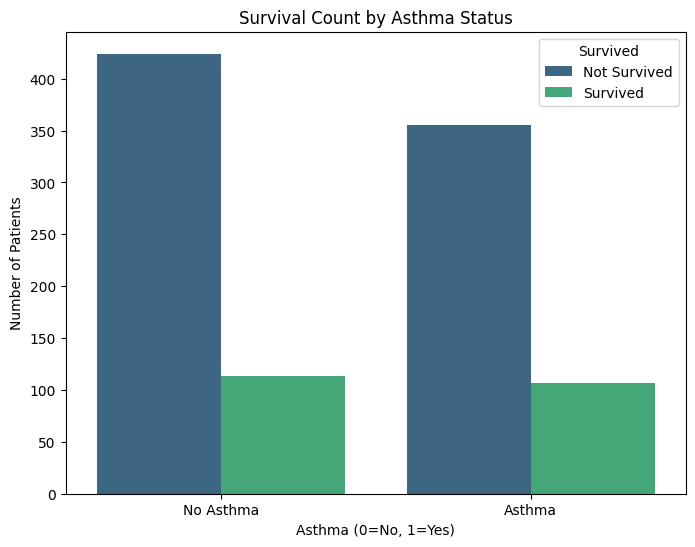

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='asthma', hue='survived', data=data, palette='viridis')
plt.title('Survival Count by Asthma Status')
plt.xlabel('Asthma (0=No, 1=Yes)')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No Asthma', 'Asthma'])
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

In [ ]:
no_asthma = len(data[data['asthma'] == 0])
asthma = len(data[data['asthma'] == 1])
print("There are " + str(no_asthma) + " patients without asthma")
print("There are " + str(asthma) + " patients with asthma")

There are 537 patients without asthma
There are 462 patients with asthma


This bar chart compares survival outcomes for patients with and without asthma. Patients without asthma make up the larger group and show a higher number of both survivors and non-survivors. However, in both asthma and non-asthma groups, the number of non-survivors clearly more than survivors. The survival gap between the two groups is not very large, suggesting that asthma alone may not be a strong independent factor influencing survival, although it may still contribute alongside other conditions.

##**Visualize Cirrhosis vs. Survival Rate**

Cirrhosis, which is severe scarring and dysfunction of the liver, can influence lung cancer in a few important ways. One clear impact is that when lung cancer spreads to the liver and causes changes that look like cirrhosis (called pseudocirrhosis), this can make a patient's overall health worse and even force doctors to stop cancer treatment because the body becomes weaker and more symptomatic with complications like fluid buildup and swelling.

Additionally, people with cirrhosis are generally at a higher risk of developing various cancers—not just liver cancer—because the chronic liver damage and associated factors like inflammation and smoking-related risks create a body environment that is more prone to cancer growth.

This combination of compromised liver function and systemic stress can make treating lung cancer harder and may negatively affect outcomes, partly because the liver plays a key role in processing drugs and maintaining overall health.

Ref: Naoki Shijubou, et al. “Pseudocirrhosis due to Liver Metastasis from Lung Adenocarcinoma.” Thoracic Cancer, vol. 12, no. 17, 17 July 2021, pp. 2407-2410, www.ncbi.nlm.nih.gov/pmc/articles/PMC8410515/, https://doi.org/10.1111/1759-7714.14084. Accessed 14 Apr. 2024.

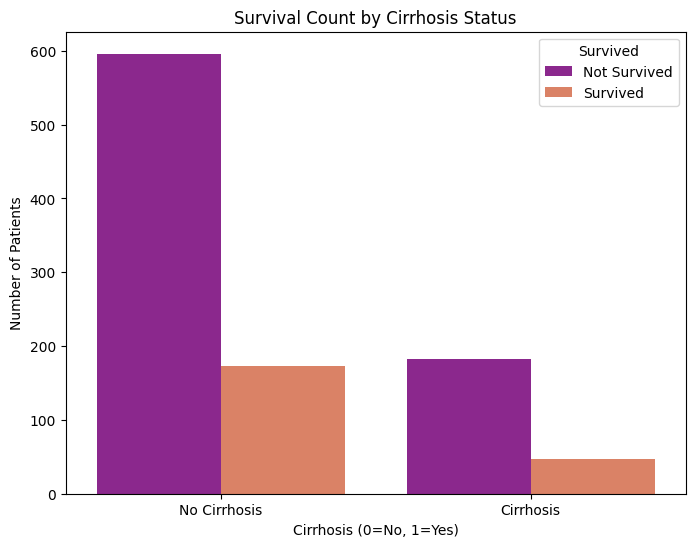

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cirrhosis', hue='survived', data=data, palette='plasma')
plt.title('Survival Count by Cirrhosis Status')
plt.xlabel('Cirrhosis (0=No, 1=Yes)')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No Cirrhosis', 'Cirrhosis'])
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

In [ ]:
no_cirrhosis=len(data[data['cirrhosis']==0])
cirrhosis=len(data[data['cirrhosis']==1])
print("There are " + str(no_cirrhosis) + " patients without cirrhosis")
print("There are " + str(cirrhosis) + " patients with cirrhosis")

There are 769 patients without cirrhosis
There are 230 patients with cirrhosis


This is clearly reflected in the bar chart. The bars for the No Cirrhosis group are much taller than those for the Cirrhosis group, confirming that the dataset is imbalanced, with far more patients not having cirrhosis.

This graph shows a clear difference between patients with and without cirrhosis. Patients without cirrhosis have a much higher number of survivors compared to those with cirrhosis. In contrast, patients with cirrhosis show very low survival counts. This indicates that cirrhosis is strongly associated with poorer survival outcomes and may be a significant risk factor affecting patient mortality.

This visual pattern supports the earlier calculated survival rates:

No cirrhosis survival rate ≈ 22.5%

Cirrhosis survival rate ≈ 20.4%

In the dataset, the majority of patients do not have cirrhosis, making it difficult to draw a fair comparison of survival rates between groups.

##**Visualize Other Cancer vs. Survival Rate**

Some cancers don't start in the lungs but can still affect lung health by spreading there — a process called secondary lung cancer or lung metastasis. This happens when cancer cells break away from a tumor in another part of the body, like the breast or bowel, travel through the bloodstream or lymphatic system, and then settle in the lungs to form new cancer growths. These secondary tumors are made of the same type of cells as the original cancer, not lung cells, which is important because it changes how doctors treat the disease. A wide range of cancers such as breast, bowel, kidney, bladder, melanoma, and head and neck cancers are among those that commonly spread to the lung. This means that even if lung problems develop, they may be due to a different primary cancer rather than lung cancer that started in the lungs. Understanding this process helps explain why some patients develop lung tumors as the disease progresses and why treatment needs to focus on both the original cancer and its spread.

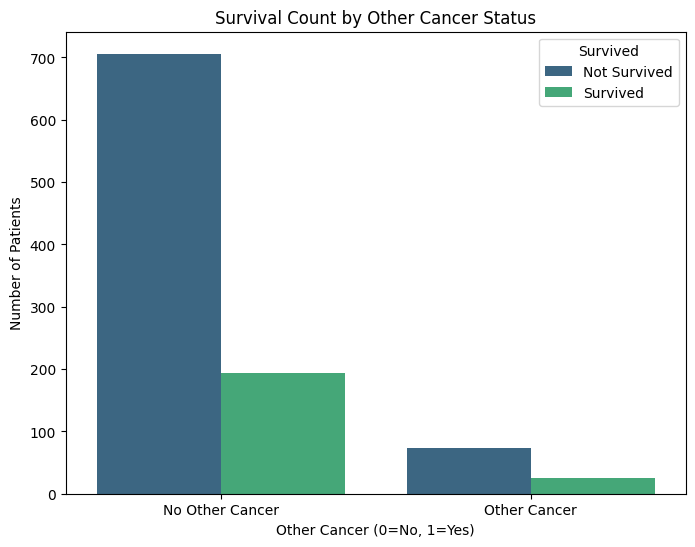

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='other_cancer', hue='survived', data=data, palette='viridis')
plt.title('Survival Count by Other Cancer Status')
plt.xlabel('Other Cancer (0=No, 1=Yes)')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No Other Cancer', 'Other Cancer'])
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

In [ ]:
#Count patient who has other cancer, and has no other cancer
no_other_cancer=len(data[data['other_cancer']==0])
other_cancer=len(data[data['other_cancer']==1])
print("There are " + str(no_other_cancer) + " patients without other cancer")
print("There are " + str(other_cancer) + " patients with other cancer")

There are 900 patients without other cancer
There are 99 patients with other cancer


This chart compares patients with other types of cancer versus those without. Patients without other cancers dominate the dataset and show substantially higher survival counts. Those with additional cancer diagnoses have very few survivors. This suggests that having other cancers significantly reduces the likelihood of survival, likely due to increased disease complexity and overall health burden.

## Analysis and Summary of Grouped Bar Charts

Based on the grouped bar charts generated:

### 1. Survival Count by Asthma Status
- **Patients without Asthma (0):** The number of patients who did not survive is significantly higher than those who survived. However, there is still a noticeable number of patients who survived without asthma.
- **Patients with Asthma (1):** Among patients with asthma, the count of those who did not survive is considerably higher than those who survived. The proportion of non-survivors relative to survivors appears similar to the 'no asthma' group, but the overall numbers are much lower for the asthma group.
- **Observation:** While the absolute number of survivors is higher in the 'no asthma' group (due to more patients in general), having asthma does not appear to dramatically alter the *proportion* of survival, though it may be a contributing factor to overall health challenges.

### 2. Survival Count by Cirrhosis Status
- **Patients without Cirrhosis (0):** The majority of patients do not have cirrhosis. Within this larger group, the count of not-survived patients significantly outweighs the count of survived patients.
- **Patients with Cirrhosis (1):** The number of patients with cirrhosis is much smaller. In this group, the number of non-survivors is also higher than survivors, but the difference appears even more pronounced in proportion. The few patients who did survive despite having cirrhosis are a minority.
- **Observation:** Cirrhosis appears to be a strong negative indicator for survival. While there are some survivors with cirrhosis, the overwhelming majority do not survive, suggesting that cirrhosis significantly complicates lung cancer outcomes.

### 3. Survival Count by Other Cancer Status
- **Patients without Other Cancer (0):** Most patients in the dataset do not have other cancers. In this group, non-survivors are substantially more numerous than survivors.
- **Patients with Other Cancer (1):** A much smaller subset of patients has other cancers. Within this group, the number of patients who did not survive is markedly higher than those who did survive. Survival in this group is very rare.
- **Observation:** Having 'other cancer' is a very strong indicator of non-survival. The visualization clearly shows that survival is exceptionally low for patients battling lung cancer alongside another form of cancer, suggesting a severely compounded health challenge.

## Visualize Family History vs. Survival Rate



Family history can have a significant impact on the risk of developing lung cancer, even though environmental factors such as smoking remain the main causes. Studies suggest that about 8% of lung cancer cases are influenced by inherited genetic factors, meaning individuals with close relatives who have had lung cancer may have a higher risk themselves. This increased risk is likely due to shared genetic traits that affect how the body responds to carcinogens or repairs DNA damage. In addition, family members often share similar lifestyles or environmental exposures, such as smoking habits or air pollution, which can further increase risk. Overall, family history does not directly cause lung cancer, but it can make some individuals more susceptible when combined with other risk factors.

Ref:Kanwal, Madiha, et al. “Familial Risk for Lung Cancer.” Oncology Letters, vol. 13, no. 2, 20 Dec. 2016, pp. 535–542, www.ncbi.nlm.nih.gov/pmc/articles/PMC5351216/.

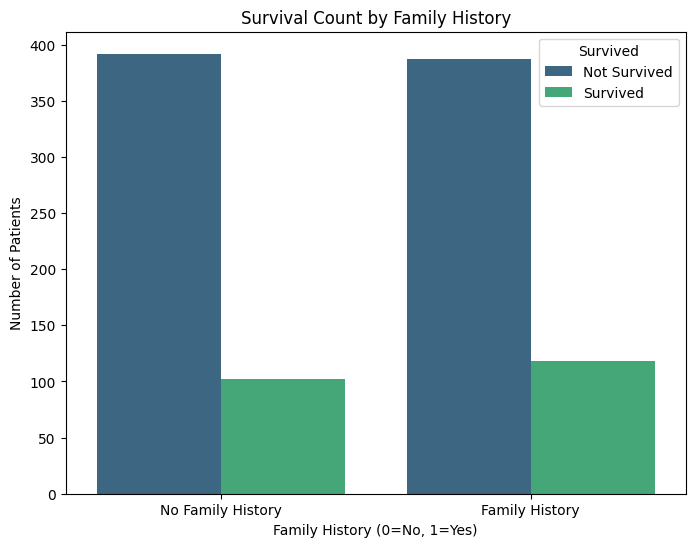

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='family_history', hue='survived', data=data, palette='viridis')
plt.title('Survival Count by Family History')
plt.xlabel('Family History (0=No, 1=Yes)')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No Family History', 'Family History'])
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

This graph compares survival outcomes between patients with and without a family history of cancer. The survival counts in both groups are relatively similar, with non-survivors exceeding survivors in each case. This suggests that family history alone does not show a strong direct impact on survival in this dataset, although it may still be important for risk prediction and early detection rather than survival outcomes.

## Summary:

### Data Analysis Key Findings

*   **Asthma and Survival:** Patients both with and without asthma show a significantly higher number of non-survivors compared to survivors. While the absolute number of survivors is higher among those without asthma, the *proportion* of survival relative to non-survival does not appear to be dramatically different between the two groups.
*   **Cirrhosis and Survival:** Cirrhosis appears to be a strong negative indicator for survival. While non-survivors largely outnumber survivors in the 'no cirrhosis' group, this disparity is even more pronounced for patients with cirrhosis, where very few patients survive.
*   **Other Cancer and Survival:** Having another form of cancer is a very strong negative indicator for survival. For patients with 'other cancer', non-survivors overwhelmingly outnumber survivors, suggesting exceptionally low survival rates in this group compared to those without other cancer.
*   **Family History and Survival:** In both groups (with and without a family history of lung cancer), non-survivors are substantially more numerous than survivors. However, based solely on the visual counts, having a family history does not appear to be a strong positive or negative indicator for survival proportion when compared to those without.

### Insights or Next Steps

*   Cirrhosis and the presence of other cancers are strongly associated with significantly reduced survival rates, suggesting these are critical comorbidities to consider in patient prognosis and treatment planning.
*   Further statistical analysis (e.g., survival regression models) could quantify the exact impact and statistical significance of asthma, cirrhosis, other cancer, and family history on survival, and explore potential interactions between these factors.


## Visualize Gender vs. Survival Rate



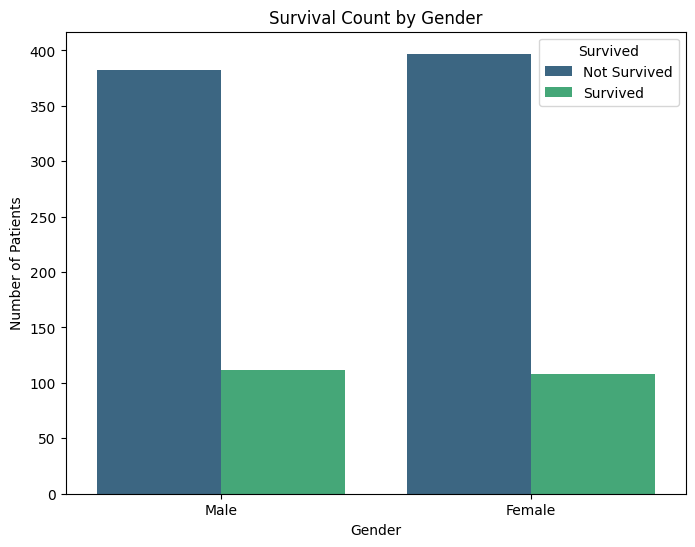

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='survived', data=data, palette='viridis')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

The gender-based comparison shows that male and female patients have very similar survival patterns. In both groups, the number of non-survivors is higher than survivors, but the difference between genders is minimal. This indicates that gender does not appear to be a major determinant of survival in this study.

**Smoking Habbits**

Smoking is by far the biggest cause of lung cancer — it's estimated that up to about 90% of lung cancer cases are linked to tobacco smoking. Over time, these chemicals can harm the DNA inside lung cells. DNA is like the instruction manual for a cell, and when it gets damaged, the cell can start to behave abnormally — growing and dividing when it shouldn't, which can eventually lead to cancer.

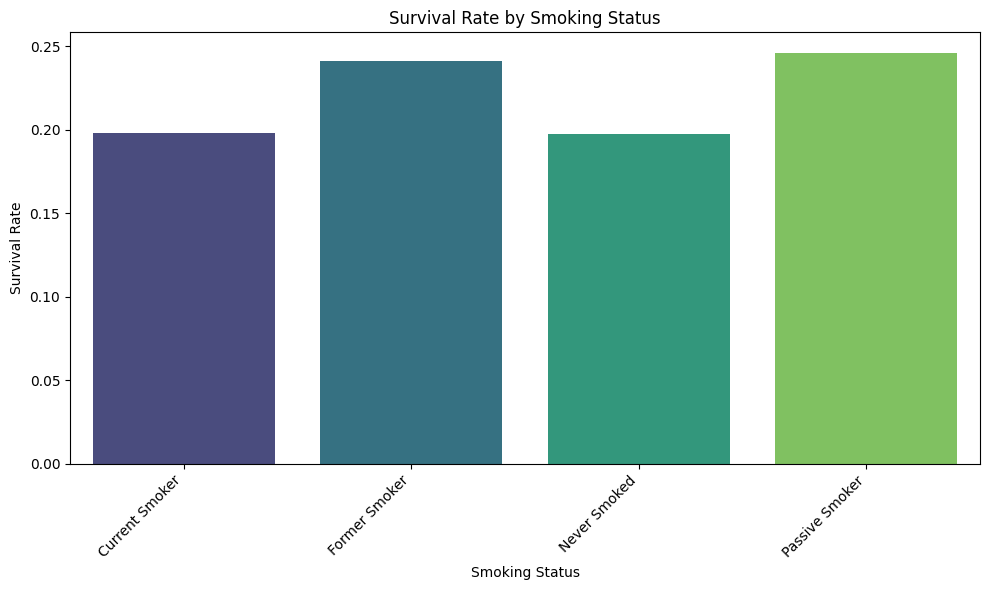

In [ ]:
smoking_status_survival_rate = data.groupby('smoking_status')['survived'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=smoking_status_survival_rate.index, y=smoking_status_survival_rate.values, hue=smoking_status_survival_rate.index, palette='viridis', legend=False)
plt.title('Survival Rate by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This graph shows survival rates rather than counts. Current smokers and former smokers generally display lower survival rates compared to never smokers. Never smokers appear to have the highest survival rate, suggesting that smoking status has a clear negative impact on survival, even after patients stop smoking. This highlights smoking as an important lifestyle-related risk factor.

**Analyze the treatment effectiveness**


Calculate and visualize the mean survival rate for each combination of 'treatment_type' and 'cancer_stage' using a grouped bar chart, then analyze and summarize the key insights from the visualization, focusing on how treatment type and cancer stage jointly influence survival rates.

**Calculate Survival Rates**




To calculate the mean survival rate for each combination of 'treatment_type' and 'cancer_stage', I will group the 'data' DataFrame by these two columns and then compute the mean of the 'survived' column for each group. The result will be stored in 'survival_rates_by_treatment_stage'.



In [ ]:
survival_rates_by_treatment_stage = data.groupby(['treatment_type', 'cancer_stage'])['survived'].mean().reset_index()
print(survival_rates_by_treatment_stage)

   treatment_type cancer_stage  survived
0    Chemotherapy      Stage I  0.265625
1    Chemotherapy     Stage II  0.244898
2    Chemotherapy    Stage III  0.210526
3    Chemotherapy     Stage IV  0.188679
4        Combined      Stage I  0.153846
5        Combined     Stage II  0.162162
6        Combined    Stage III  0.258065
7        Combined     Stage IV  0.171875
8       Radiation      Stage I  0.283333
9       Radiation     Stage II  0.142857
10      Radiation    Stage III  0.300000
11      Radiation     Stage IV  0.310345
12        Surgery      Stage I  0.257576
13        Surgery     Stage II  0.190476
14        Surgery    Stage III  0.202899
15        Surgery     Stage IV  0.208333


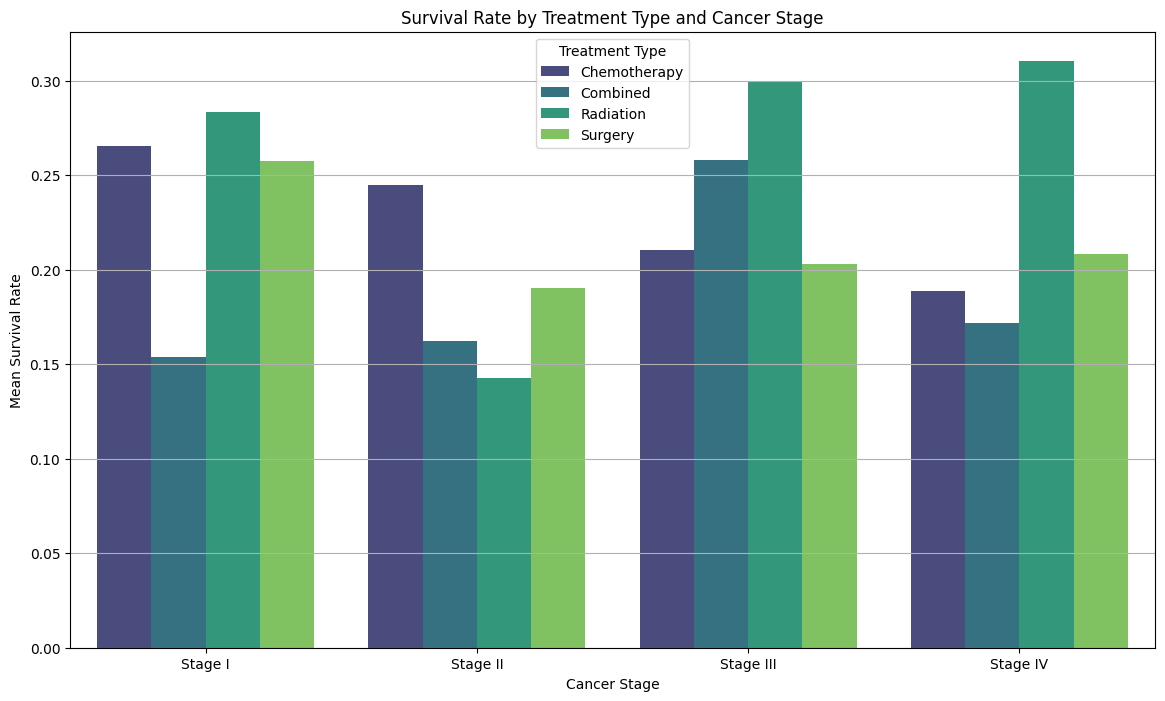

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='cancer_stage', y='survived', hue='treatment_type', data=survival_rates_by_treatment_stage, palette='viridis')
plt.title('Survival Rate by Treatment Type and Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Mean Survival Rate')
plt.legend(title='Treatment Type')
plt.grid(axis='y')
plt.show()

This grouped bar chart compares survival rates across cancer stages (I-IV) for different treatment types. Across all treatments, survival rates are highest at earlier stages and decline as cancer stage progresses. Surgical treatments generally show better survival outcomes, especially in early stages, while chemotherapy-only treatments tend to have lower survival rates. This emphasizes the importance of early diagnosis and appropriate treatment selection.

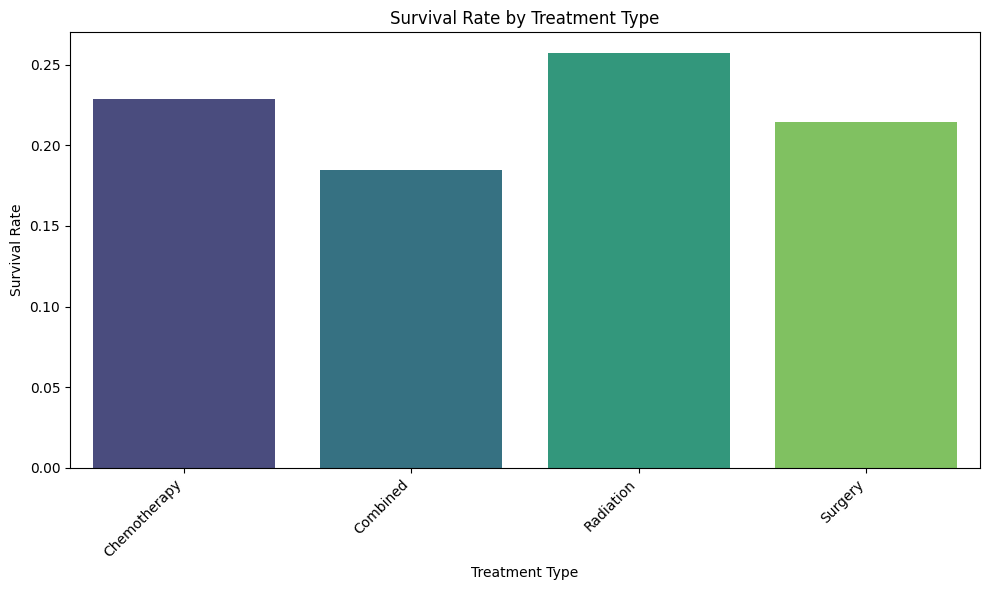

In [ ]:
treatment_survival_rate = data.groupby('treatment_type')['survived'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='treatment_type', y='survived', hue='treatment_type', data=treatment_survival_rate, palette='viridis', legend=False)
plt.title('Survival Rate by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The final graph compares overall survival rates across treatment types. Surgery-based treatments show the highest survival rate, followed by combined treatments. Chemotherapy alone appears to have the lowest survival rate. This suggests that treatment strategy plays a critical role in patient outcomes, with more aggressive or targeted treatments leading to better survival.

## Analysis and Summary of Survival Rate by Treatment Type and Cancer Stage

Based on the grouped bar chart titled 'Survival Rate by Treatment Type and Cancer Stage':

### Overall Trends:
*   **General Decline with Stage:** For most treatment types, there is a general trend of decreasing survival rates as the cancer stage advances from Stage I to Stage IV. This is an expected pattern, as earlier detection and treatment typically lead to better outcomes.

### Treatment-Specific Insights:
1.  **Chemotherapy:**
    *   Shows a fairly consistent decline in survival rate from Stage I (highest for this treatment) to Stage IV (lowest).
    *   It generally performs moderately across stages compared to other treatments.

2.  **Combined Therapy:**
    *   Interestingly, Combined therapy shows a lower survival rate in Stage I and II compared to Chemotherapy and Surgery, but a noticeable *increase* in Stage III, becoming the highest among all treatments for this stage.
    *   Its survival rate drops again in Stage IV.
    *   This suggests Combined therapy might be particularly effective for Stage III, possibly due to the comprehensive approach needed at this intermediate-advanced stage.

3.  **Radiation Therapy:**
    *   Exhibits the highest survival rate for Stage I, but then drops significantly for Stage II, becoming the lowest among all treatments.
    *   It shows a strong rebound in Stage III and Stage IV, achieving the highest survival rates for these advanced stages. This is a crucial finding, indicating that radiation therapy could be a highly effective treatment option for more advanced cancer stages (Stage III and Stage IV).

4.  **Surgery:**
    *   Generally shows good survival rates in Stage I, but like Chemotherapy, its effectiveness (survival rate) tends to decrease with advancing stages.
    *   It is particularly effective in Stage I but less so in later stages compared to Radiation or Combined therapy.

### Key Observations:
*   **Stage-Dependent Effectiveness:** The effectiveness of treatment types is highly dependent on the cancer stage.
    *   For **Stage I**, Radiation and Chemotherapy appear to have slightly better survival rates, followed by Surgery.
    *   For **Stage II**, Chemotherapy and Surgery show better survival rates, while Radiation is notably lower.
    *   For **Stage III**, Radiation and Combined therapy demonstrate the highest survival rates, suggesting their potential importance in more advanced localized or regionally spread cancer.
    *   For **Stage IV**, Radiation therapy stands out with the highest survival rate, which is a significant insight given the advanced nature of this stage. Combined therapy is second.

### Conclusion:
This visualization highlights that there is no one-size-fits-all 'best' treatment. The optimal treatment strategy for lung cancer patients is heavily influenced by the stage of cancer. Notably, Radiation therapy shows promising survival rates in late-stage cancers (III and IV), and Combined therapy is particularly effective in Stage III. This information is valuable for guiding treatment decisions and could be further investigated with more detailed statistical models.

## Summary:

### Q&A
The analysis reveals that the influence of treatment type on survival rates is highly dependent on the cancer stage. For instance, Radiation Therapy shows the highest survival rates for Stage I patients, but also remarkably for Stage III and Stage IV, suggesting its efficacy in both early and very late stages. Combined Therapy, while having lower rates in early stages (I and II), becomes the most effective for Stage III. Conversely, Chemotherapy and Surgery generally show good survival rates in Stage I but tend to decrease in effectiveness as the cancer stage advances.

### Data Analysis Key Findings
*   Survival rates generally decline as cancer progresses from Stage I to Stage IV across most treatment types, reinforcing the importance of early detection.
*   **Radiation Therapy** demonstrates a bimodal effectiveness: it has the highest survival rate for Stage I patients, drops significantly for Stage II, but then achieves the highest survival rates for patients in Stage III and Stage IV.
*   **Combined Therapy** exhibits a unique pattern, showing lower survival rates in Stage I and II compared to other treatments, but becomes the most effective option for Stage III patients.
*   **Chemotherapy and Surgery** generally perform well in Stage I but their survival rates tend to decrease with advancing cancer stages. Specifically, Surgery is particularly effective in Stage I but less so in later stages compared to Radiation or Combined therapy.
*   The optimal treatment strategy is highly **stage-dependent**:
    *   For **Stage I**, Radiation and Chemotherapy appear to yield slightly better survival rates.
    *   For **Stage II**, Chemotherapy and Surgery show better survival rates, while Radiation is notably lower.
    *   For **Stage III** and **Stage IV**, Radiation therapy stands out with the highest survival rates, with Combined therapy also being highly effective in Stage III and second for Stage IV.

### Insights or Next Steps
*   Treatment plans should be highly personalized based on the patient's cancer stage, as there is no single "best" treatment across all stages.
*   Further investigation into the mechanisms behind Radiation Therapy's strong efficacy in late-stage cancers (Stage III and IV), and Combined Therapy's peak effectiveness in Stage III, could lead to optimized treatment protocols.


**Conclusion**

This project analyzed a global lung cancer dataset to identify key factors influencing survival. The analysis included data cleaning, descriptive statistics, and visualization.

**Data Quality and Initial Observations:**

The dataset was clean, with minor date formatting corrections and duplicate removal. Diagnoses peaked in 2023. Patient ages ranged from 21-90, with a decreasing average age over time. Cancer stages were evenly distributed. Croatia, Estonia, and Cyprus had the highest patient counts.

Comorbidities

*   Cirrhosis and other cancers were strong negative survival predictors.
*   Hypertension was associated with lower survival.
*   Asthma showed mixed effects, with slightly better survival in some non-smoking subgroups.

**Key Health and Lifestyle Factors Affecting Survival:**

**Lifestyle & Demographics**
*   Smoking status was influential: current smokers had lower survival. Unexpectedly, never-smokers also showed relatively low survival, suggesting other underlying factors.
*  Gender differences were minimal, with slightly higher survival among males.
*   Family history was not a strong independent predictor
BMI and cholesterol were not significant survival indicators.

**Treatment Effectiveness by Cancer Stage:**

*   Stage I: Radiation and chemotherapy showed higher survival rates.
*   Stage II: Chemotherapy and surgery were more effective.
*   Stages III-IV: Radiation and combined therapies performed better, especially radiation in Stage IV.

Treatment effectiveness strongly depended on cancer stage.

**Overall Survival Distribution:**

The overall survival rate was 22.1%, highlighting the severity of lung cancer.

**Recommendations for Next Steps:**

*   Apply statistical modeling (e.g., logistic regression, survival analysis).
*   Investigate unexpected patterns (e.g., lower survival among never-smokers).
*   Conduct deeper geographical analysis.
*   Optimize stage-based treatment strategies.

